# DAT 301 - Assignment 5: CNN (1 of 5)
- Name: Colin Bowers (bowerc3)
- Date: Mar 20, 2024

## Overview of Approach

A few different parameters where changed, one at a time, and the model was retrained.  Only 3 basic changes were chosen due to the limited processing capability of the machine being used.  More opportunities for further paramter tuning is available especially if useding a grid search or random search for hyperparamter tuning.  

Each experiment is wholly contained within its own notebook and run separately.  Details and a summary of the results are below.

Finally, the parameters and configuration changes that resulted in positive effect on accuracy were chosen and combined in a final model.  The notebook was rewritten for code cleanups and streamlining.

## Summary of Results

|Experiment|Filename|Description|Accuracy (%)|Increase (%)|
|:---|:---|:---|---:|---:|
|original|assignment5.ipynb|Original|79.55|--| 
|#1|assignment5-1.ipynb|Adding another convolutional layer (total of 3)|83.90|<font color="green">+4.35</font>|
|#2|assignment5-2.ipynb|Increasing kernel size (from 3x3 to 5x5)|77.15|<font color="red">-2.40</font>|
|#3|assignment5-3.ipynb|Increasing number of filters (from 32 to 64)|81.15|<font color="green">+1.60</font>|
|**Final**|**assignment5-final.ipynb**|**Combining all positive changes from the experiments**|**84.35**|<font color="green">**+4.80**</font>|

# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

2024-03-11 11:03:00.673104: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 11:03:00.777142: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 11:03:00.777252: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 11:03:00.785467: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-11 11:03:00.821194: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 11:03:00.823437: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Model Summary

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

## Part 3 - Training the CNN

### Compiling the CNN

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [14]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


2024-03-11 11:03:09.517204: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15745024 exceeds 10% of free system memory.
2024-03-11 11:03:09.571701: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28096128 exceeds 10% of free system memory.
2024-03-11 11:03:09.573762: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28096128 exceeds 10% of free system memory.
2024-03-11 11:03:09.705702: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 7872512 exceeds 10% of free system memory.
2024-03-11 11:03:09.705800: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15745024 exceeds 10% of free system memory.


250/250 [==============================] - 37s 144ms/step - loss: 0.6769 - accuracy: 0.5719 - val_loss: 0.6317 - val_accuracy: 0.6355
Epoch 2/25
250/250 [==============================] - 28s 111ms/step - loss: 0.6108 - accuracy: 0.6678 - val_loss: 0.5850 - val_accuracy: 0.7095
Epoch 3/25
250/250 [==============================] - 27s 110ms/step - loss: 0.5640 - accuracy: 0.7122 - val_loss: 0.5702 - val_accuracy: 0.7120
Epoch 4/25
250/250 [==============================] - 28s 111ms/step - loss: 0.5318 - accuracy: 0.7316 - val_loss: 0.5049 - val_accuracy: 0.7575
Epoch 5/25
250/250 [==============================] - 27s 110ms/step - loss: 0.5036 - accuracy: 0.7539 - val_loss: 0.5189 - val_accuracy: 0.7375
Epoch 6/25
250/250 [==============================] - 29s 114ms/step - loss: 0.4828 - accuracy: 0.7682 - val_loss: 0.4866 - val_accuracy: 0.7715
Epoch 7/25
250/250 [==============================] - 31s 126ms/step - loss: 0.4745 - accuracy: 0.7751 - val_loss: 0.4966 - val_accuracy: 0.7

### Evaluate the Model

63/63 - 3s - loss: 0.5715 - accuracy: 0.7955 - 3s/epoch - 42ms/step


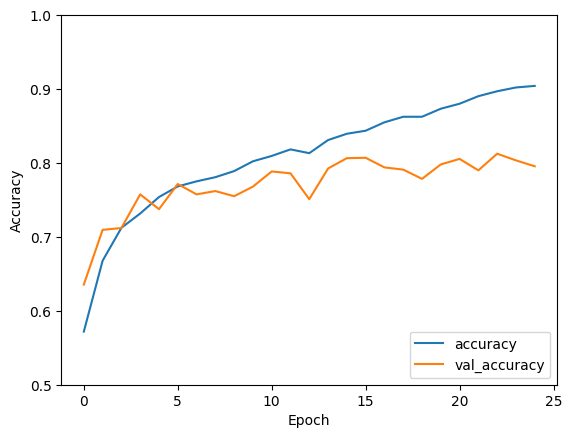

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(test_set, verbose=2)

In [16]:
print(f"Accuracy: {test_acc}")
print(f"    Loss: {test_loss}")

Accuracy: 0.7954999804496765
    Loss: 0.5715421438217163


In [26]:
round(test_acc*100, 4)

79.55

## Part 4 - Making a single prediction

In [17]:
import numpy as np
from keras.preprocessing import image

def prediction(fname):
    test_image = image.load_img('dataset/single_prediction/'+fname, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
      prediction = 'dog'
    else:
      prediction = 'cat'
    return prediction

In [18]:
print(prediction('cat_or_dog_1.jpg'))

1/1 [==============================] - 0s 125ms/step
dog


In [19]:
print(prediction('dog1.jpg'))

1/1 [==============================] - 0s 20ms/step
dog


In [20]:
print(prediction('dog2.jpg'))

1/1 [==============================] - 0s 49ms/step
dog


In [21]:
print(prediction('tiger1.jpg'))

1/1 [==============================] - 0s 23ms/step
dog


In [22]:
print(prediction('wolf1.jpg'))

1/1 [==============================] - 0s 28ms/step
dog


In [23]:
print(prediction('cat1.webp'))

1/1 [==============================] - 0s 21ms/step
cat
